# MI-SIB HW2

In [16]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats as stats


TIMES_COL = 0
SIZES_COL = 1


def get_dump_data(filename):
    with open(filename) as f:
        lines = f.readlines()
    
    timestamps = [ line.split()[TIMES_COL] for line in lines ]
    sizes      = [ int(line.split()[SIZES_COL]) for line in lines ]
    return timestamps, sizes


def sizes_info(sizes):
    np_sizes = np.array(sizes)
    print("Sizes mean [B]:", np_sizes.mean())

    EQUAL_BINS = np.arange(min(np_sizes), max(np_sizes) + 50, 50)
    plt.hist(np_sizes, bins=EQUAL_BINS)
    plt.title("Packet sizes")
    plt.xlabel("Size [B]")
    plt.ylabel("Packet samples")
    plt.show()
    
    stats.probplot(np_sizes, dist="expon", plot=plt)
    plt.show()
    
    
def times_info(times):
    dates = [ dt.datetime.strptime(t, "%H:%M:%S.%f") for t in times ]
    deltas = [ date.microsecond for date in dates ]
    np_deltas = np.array(deltas) / 1000

    print("Time deltas mean [ms]:", np_deltas.mean())
    EQUAL_BINS = np.arange(min(np_deltas), max(np_deltas) + 20, 20)
    plt.hist(np_deltas, bins=EQUAL_BINS)
    plt.title("Times between sending packets")
    plt.xlabel("Time [ms]")
    plt.ylabel("Packet samples")
    plt.show()
    
    stats.probplot(np_deltas, dist="expon", plot=plt)
    plt.show()
    
    
exp_times, exp_sizes = get_dump_data("logs/exp.dump")
const_traffic_times, const_traffic_sizes = get_dump_data("logs/const_traffic.dump")
exp_traffic_times, exp_traffic_sizes = get_dump_data("logs/exp_traffic.dump")

## 1) Random exp data (arrival exp 0.02, length exp 576)

### Packet sizes

Sizes mean [B]: 586.548564447


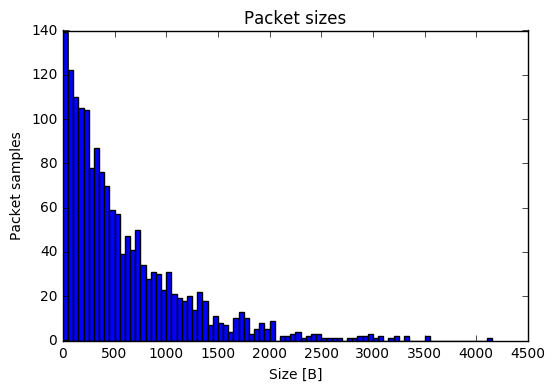

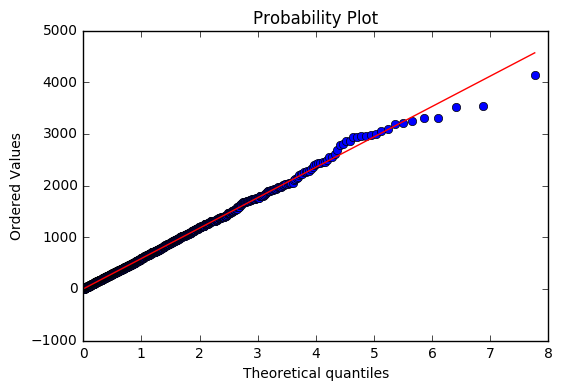

In [17]:
sizes_info(exp_sizes)

### Inter-packet times

Time deltas mean [ms]: 19.7255638363


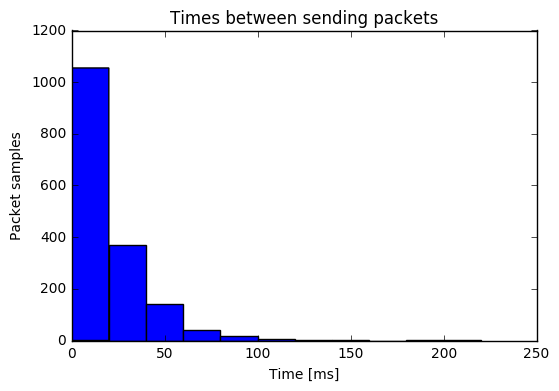

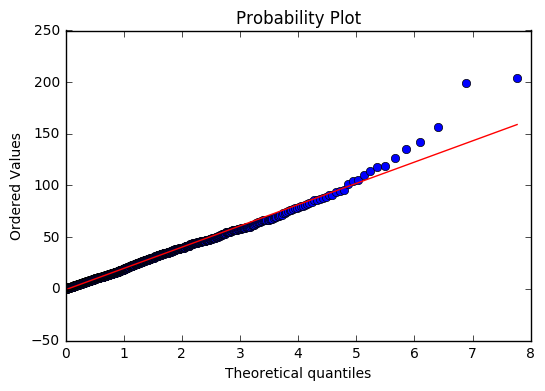

In [18]:
times_info(exp_times)

## 2a) Traffic generator (arrival exp 0.02, length 1400)

### Packet sizes

Sizes mean [B]: 1398.52307692


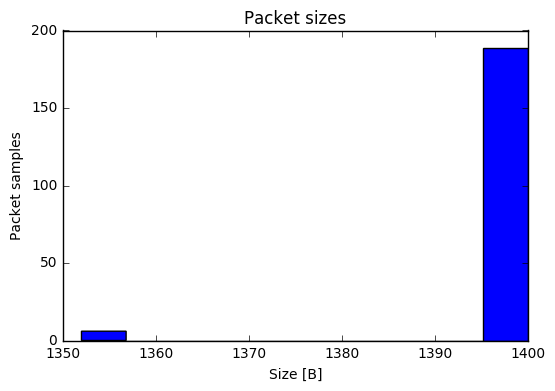

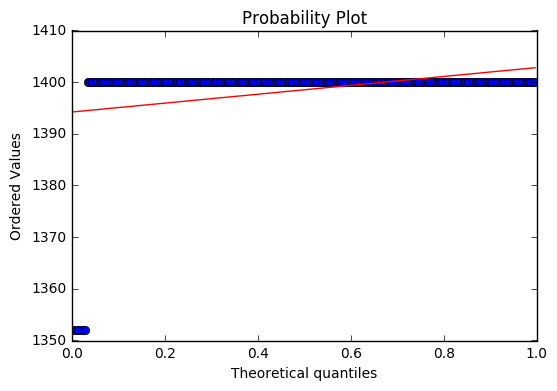

In [19]:
np_sizes = np.array(const_traffic_sizes)
print("Sizes mean [B]:", np_sizes.mean())

plt.hist(np_sizes)
plt.title("Packet sizes")
plt.xlabel("Size [B]")
plt.ylabel("Packet samples")
plt.show()
    
stats.probplot(np_sizes, dist="uniform", plot=plt)
plt.show()

### Inter-packet times

Time deltas mean [ms]: 169.831989744


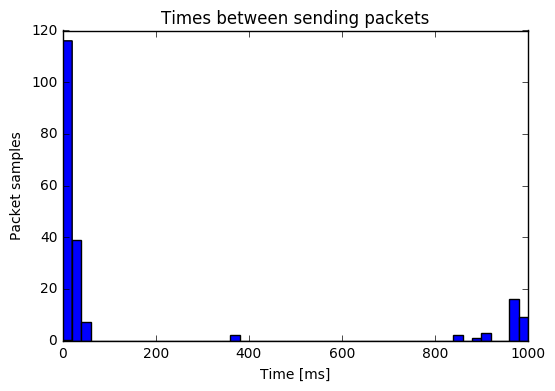

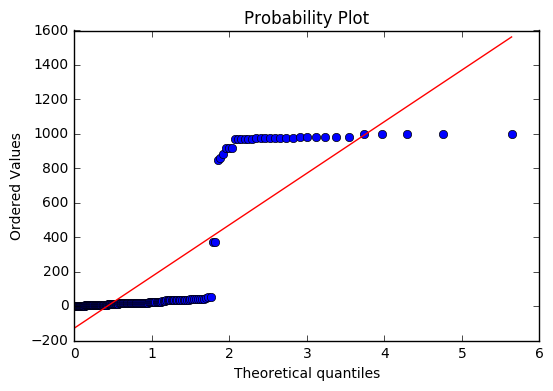

In [20]:
times_info(const_traffic_times)

## 2b) Traffic generator (arrival exp 0.02, length exp 576)

### Packet sizes

Sizes mean [B]: 462.387769284


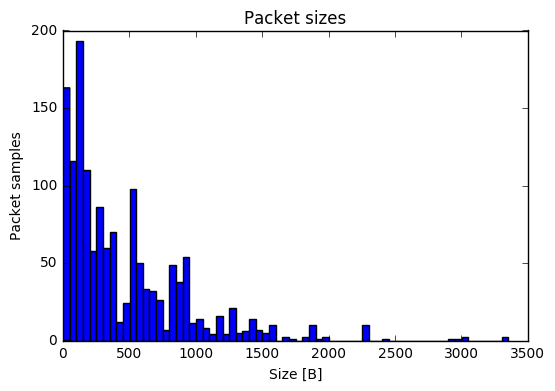

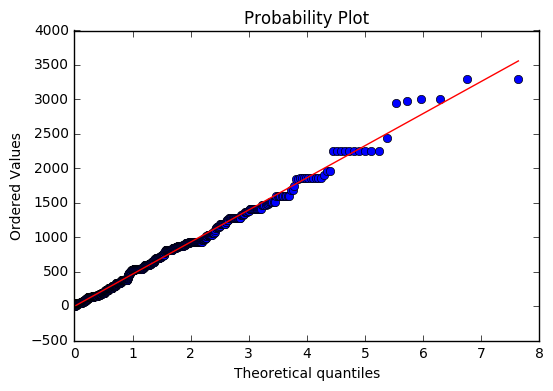

In [21]:
sizes_info(exp_traffic_sizes)

### Inter-packet times

Time deltas mean [ms]: 48.0130354413


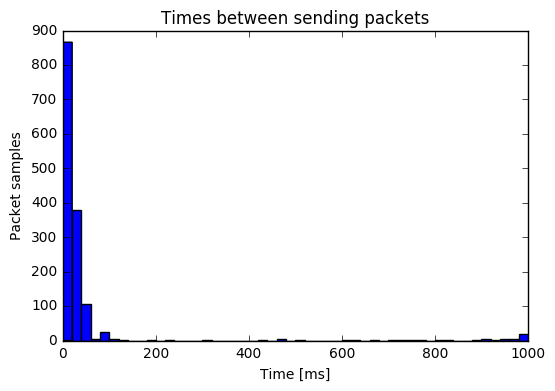

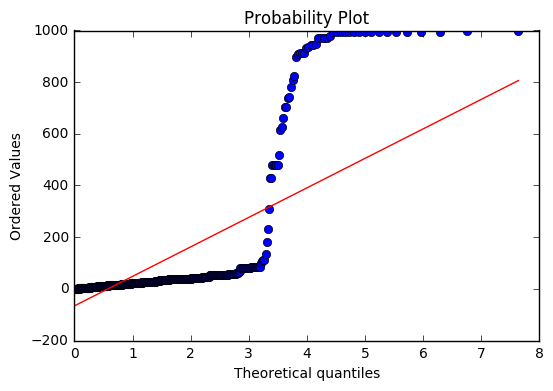

In [22]:
times_info(exp_traffic_times)